# Web Scraping with Requests & BeautifulSoup

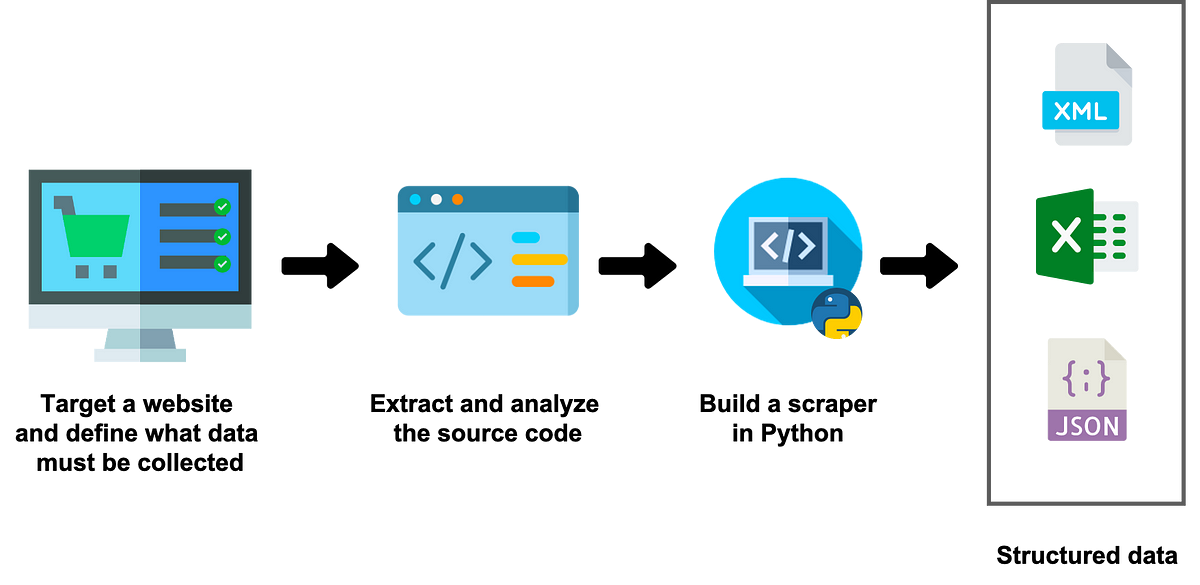

## Problem Statement

Imagine you want to create a simple web scraper to extract information about the latest news articles from a news website. The goal is to download the HTML pages, inspect the structure, and extract relevant information using `BeautifulSoup`. 

<img src="https://i.imgur.com/IEwBm3b.png" height=500 width=500>

### Task:

1. **Download the HTML Page:**
   Create a function `download_page(url)` that takes a URL as input, uses `requests` to fetch the HTML content, and returns the HTML text.

In [1]:
pip install requests --q

Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests

In [4]:
requests.get("https://indianexpress.com/section/india/").status_code

200

In [5]:
requests.get("https://indianexpress.com/section/india/").text

'<!DOCTYPE html>\n<html lang="en" xmlns:og="https://ogp.me/ns#">\n<head>\n<meta charset="UTF-8">\n\t\t\t<meta name="viewport" content="width=device-width,minimum-scale=1,initial-scale=1">\n\t\t<title>India News: Latest News India, Today Breaking News Headlines from India and Updates in Bharat | The Indian Express</title><meta property="fb:pages" content="163648403825" /><meta property="fb:pages" content="168619349359" /><meta property="fb:pages" content="185763818464532" /><meta property="fb:pages" content="1494497934210205" /><meta property="fb:pages" content="1774784956154724" /><meta property="fb:pages" content="1567211863297748" /><meta property="fb:pages" content="291465928041678" /><meta property="fb:pages" content="339520043138547" /><meta property="fb:pages" content="376556412852346" /><meta property="fb:pages" content="215732349153100" /><meta property="og:type" content="website" /><meta property="og:url" content="https://indianexpress.com/section/india/" /><meta property="og:

In [4]:
page_content =requests.get("https://indianexpress.com/section/india/").text

In [5]:
# with open("news.html", "w") as news_file:
#     news_file.write(page_content)

In [6]:
def download_page(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.text
    else:
        print(f"Failed to retrieve the page. Status code: {response.status_code}")
        return None

In [7]:
# with open('news-topics.html', 'w') as file:
#     file.write(page_content)

In [8]:
doc = download_page("https://indianexpress.com/section/india/page/1/")

In [1]:
# doc

2. **Inspect the HTML Structure:**
   Manually inspect the HTML structure of the news articles on the website. Identify common tags and attributes that contain information you want to extract, such as article titles, authors, and publication dates.
   
<img src ="https://i.imgur.com/ZUbSRb8.png" height=800 width=800>

3. **Extract Information using BeautifulSoup:**
   Create functions to extract information from the HTML using `BeautifulSoup`.

In [10]:
pip install bs4 --q

Note: you may need to restart the kernel to use updated packages.


In [11]:
from bs4 import BeautifulSoup

In [12]:
from bs4 import BeautifulSoup

In [13]:
sample_html = """
<html>
<head>
    <title>Short HTML Example</title>
</head>
<body>
    <h1>Welcome to My Website</h1>

    <p>This is a short example page.</p>

    <a href="https://example.com">Visit Example.com</a>

    <img src="example.jpg" alt="Example Image">

    <ul class = "top-list">
        <li>Item 1</li>
        <li>Item 2</li>
        <li>Item 3</li>
    </ul>
    <footer>
        <p>&copy; 2024 My Website. All rights reserved.</p>
    </footer>
</body>
</html>
"""

In [14]:
BeautifulSoup(doc).title.text

'India News: Latest News India, Today Breaking News Headlines from India and Updates in Bharat | The Indian Express'

In [15]:
sample_doc = BeautifulSoup(sample_html)

In [16]:
sample_doc.find('ul', class_='top-list')

<ul class="top-list">
<li>Item 1</li>
<li>Item 2</li>
<li>Item 3</li>
</ul>

In [17]:
sample_doc.find('ul', class_='top-list').find_all('li', recursive=False)

[<li>Item 1</li>, <li>Item 2</li>, <li>Item 3</li>]

4. **Functions for Each Class:**
   - `get_article_titles(html)`: Extract and print the titles of the news articles.
   - `get_article_info(html)`: Extract and print the information paragraph of the news articles.
   - `get_article_dates(html)`: Extract and print the publication dates of the news articles.
   - `get_article_link(html)`: Extract and print the hyperlink of the news articles.

In [18]:
BeautifulSoup(doc, 'html.parser').find_all('div', class_="nation")[0].find_all('div',class_="date")[3].text

'February 23, 2024 20:51 IST'

In [19]:
parse_content = BeautifulSoup(doc)

In [20]:
parse_content.find_all('h2',class_="title")[2].text

'Kamal Nath to join Rahul’s yatra in March first week, say Congress leaders'

In [21]:
def get_title(parsed_content):
    titles = parsed_content.find_all('h2',class_ ='title')
    for i in titles:
        print(i.text)

In [22]:
get_title(parse_content)

Heavy rain plays spoilsport on first 2 days of Agartala Book Fair, footfall down to a trickle
Which law gives legitimacy to child born outside formal marriage, asks Supreme Court
Kamal Nath to join Rahul’s yatra in March first week, say Congress leaders
ED summons former Uttarakhand minister Harak Singh Rawat, daughter-in-law in money laundering case
Plea in Supreme Court alleges violation of farmers’ rights by Centre, 4 states
Bengal Police claim arresting ‘BJP leader’ on charges of running sex racket; party denies association
Days after 2 Congress MLAs praised Himanta-led BJP govt, party moves to disqualify them from Assam Assembly
ED opposes Shahjahan Sheikh’s anticipatory bail plea, says he is very influential
India, Maldives and Sri Lanka’s ‘Dosti’ in Indian Ocean Region near Male
‘No justice, no closure’: Family of Jaahnavi Kandula as US police officer is let off the hook
Calcutta HC’s ‘control sexual urges’ advice to girls: SC to hear suo motu writ petition, WB’s appeal on May 2

In [23]:
def get_title(parsed_content):
    try:
        titles = parsed_content.find_all('h2',class_="title")
        if titles == []:
            titles = parsed_content.find_all('h2',class_ = "o-opin-article__title")
        for i in titles:
            print(i.text)
    except:
        print("NA")

In [24]:
opinions = download_page('https://indianexpress.com/section/opinion/')

opinions_html = BeautifulSoup(opinions)

In [25]:
get_title(opinions_html)

As Russia-Ukraine conflict reaches two year mark, it is advantage Putin
CBSE’s open book exam experiment: How to make exams about critical thought, not surveillance and anxiety
Remembering Ameen Sayani, the man with the golden voice
Best of Both Sides | Pratinav Anil writes: A mosque in India vs a temple in PakistanPremium Story
Best of both sides | Shazia Ilmi writes: On Kashi and Mathura, Indian Muslims have the chance to script a changePremium Story
Pratap Bhanu Mehta writes: On recent Supreme Court verdicts, hold the celebrations
February 23, 1984, Forty Years Ago: Israel doesn’t have a pact
Express View on lawsuit against Tinder, Hinge: Love’s no game
Express View: No bail for Manish Sisodia
Express View on Pakistan elections: Crown of thorns
Upendra Baxi writes: Adieu, Fali, my friend
Former Election Commissioner Ashok Lavasa writes: With SC judgment on electoral bonds, truth will be out
Fali S Nariman: An example, and inspiration
The words of Fali Nariman: Excerpts of his writin

In [26]:
for i in parse_content.find_all('h2',class_="title"):
    print(i.text)

Heavy rain plays spoilsport on first 2 days of Agartala Book Fair, footfall down to a trickle
Which law gives legitimacy to child born outside formal marriage, asks Supreme Court
Kamal Nath to join Rahul’s yatra in March first week, say Congress leaders
ED summons former Uttarakhand minister Harak Singh Rawat, daughter-in-law in money laundering case
Plea in Supreme Court alleges violation of farmers’ rights by Centre, 4 states
Bengal Police claim arresting ‘BJP leader’ on charges of running sex racket; party denies association
Days after 2 Congress MLAs praised Himanta-led BJP govt, party moves to disqualify them from Assam Assembly
ED opposes Shahjahan Sheikh’s anticipatory bail plea, says he is very influential
India, Maldives and Sri Lanka’s ‘Dosti’ in Indian Ocean Region near Male
‘No justice, no closure’: Family of Jaahnavi Kandula as US police officer is let off the hook
Calcutta HC’s ‘control sexual urges’ advice to girls: SC to hear suo motu writ petition, WB’s appeal on May 2

In [27]:
def get_article_titles(html):
    art_title = []
    soup = BeautifulSoup(html, 'html.parser')
    articles = soup.find('div', class_='nation')
    titles = articles.find_all('h2')
    for title in titles:
        art_title.append(title.text)
    return art_title

In [28]:
titles = get_article_titles(doc)

titles

['Heavy rain plays spoilsport on first 2 days of Agartala Book Fair, footfall down to a trickle',
 'Which law gives legitimacy to child born outside formal marriage, asks Supreme Court',
 'Kamal Nath to join Rahul’s yatra in March first week, say Congress leaders',
 'ED summons former Uttarakhand minister Harak Singh Rawat, daughter-in-law in money laundering case',
 'Plea in Supreme Court alleges violation of farmers’ rights by Centre, 4 states',
 'Bengal Police claim arresting ‘BJP leader’ on charges of running sex racket; party denies association',
 'Days after 2 Congress MLAs praised Himanta-led BJP govt, party moves to disqualify them from Assam Assembly',
 'ED opposes Shahjahan Sheikh’s anticipatory bail plea, says he is very influential',
 'India, Maldives and Sri Lanka’s ‘Dosti’ in Indian Ocean Region near Male',
 '‘No justice, no closure’: Family of Jaahnavi Kandula as US police officer is let off the hook',
 'Calcutta HC’s ‘control sexual urges’ advice to girls: SC to hear su

In [29]:
parse_content

<!DOCTYPE html>

<html lang="en" xmlns:og="https://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width,minimum-scale=1,initial-scale=1" name="viewport"/>
<title>India News: Latest News India, Today Breaking News Headlines from India and Updates in Bharat | The Indian Express</title><meta content="163648403825" property="fb:pages"><meta content="168619349359" property="fb:pages"><meta content="185763818464532" property="fb:pages"/><meta content="1494497934210205" property="fb:pages"/><meta content="1774784956154724" property="fb:pages"/><meta content="1567211863297748" property="fb:pages"/><meta content="291465928041678" property="fb:pages"/><meta content="339520043138547" property="fb:pages"/><meta content="376556412852346" property="fb:pages"/><meta content="215732349153100" property="fb:pages"/><meta content="website" property="og:type"/><meta content="https://indianexpress.com/section/india/" property="og:url"/><meta content="The Indian Express" property="o

In [30]:
parse_content.find('div',class_="date").text.strip()

'February 23, 2024 21:25 IST'

In [31]:
parse_content.find_all('div',class_="date")

[<div class="date">February 23, 2024 21:25 IST</div>,
 <div class="date">February 23, 2024 21:21 IST</div>,
 <div class="date">February 23, 2024 20:56 IST</div>,
 <div class="date">February 23, 2024 20:51 IST</div>,
 <div class="date"> February 23, 2024  20:45 IST</div>,
 <div class="date">February 23, 2024 20:36 IST</div>,
 <div class="date"> February 23, 2024  20:12 IST</div>,
 <div class="date">February 23, 2024 19:50 IST</div>,
 <div class="date">February 23, 2024 18:38 IST</div>,
 <div class="date"> February 23, 2024  20:47 IST</div>,
 <div class="date">February 23, 2024 17:04 IST</div>,
 <div class="date"> February 23, 2024  17:03 IST</div>,
 <div class="date">February 23, 2024 16:53 IST</div>,
 <div class="date">February 23, 2024 16:31 IST</div>,
 <div class="date">February 23, 2024 15:31 IST</div>,
 <div class="date">February 23, 2024 15:23 IST</div>,
 <div class="date">February 23, 2024 14:44 IST</div>,
 <div class="date">February 23, 2024 14:01 IST</div>,
 <div class="date"> 

In [32]:
def get_dates(parsed_content):
    dates = parsed_content.find_all('div',class_="date")
    for i in dates:
        print(i.text.strip())

In [33]:
get_dates(parse_content)

February 23, 2024 21:25 IST
February 23, 2024 21:21 IST
February 23, 2024 20:56 IST
February 23, 2024 20:51 IST
February 23, 2024  20:45 IST
February 23, 2024 20:36 IST
February 23, 2024  20:12 IST
February 23, 2024 19:50 IST
February 23, 2024 18:38 IST
February 23, 2024  20:47 IST
February 23, 2024 17:04 IST
February 23, 2024  17:03 IST
February 23, 2024 16:53 IST
February 23, 2024 16:31 IST
February 23, 2024 15:31 IST
February 23, 2024 15:23 IST
February 23, 2024 14:44 IST
February 23, 2024 14:01 IST
February 23, 2024  14:02 IST
February 23, 2024 13:46 IST
February 23, 2024 12:47 IST
February 23, 2024  17:23 IST
February 23, 2024  11:34 IST
February 23, 2024  11:54 IST
February 23, 2024  12:36 IST


In [34]:
def get_article_dates(html):
    art_date = []
    soup = BeautifulSoup(html, 'html.parser')
    articles = soup.find('div', class_='nation')
    dates = articles.find_all('div',class_="date")
    for date in dates:
        art_date.append(date.text)
    return art_date

In [35]:
dates = get_article_dates(doc)

dates

['February 23, 2024 21:25 IST',
 'February 23, 2024 21:21 IST',
 'February 23, 2024 20:56 IST',
 'February 23, 2024 20:51 IST',
 ' February 23, 2024  20:45 IST',
 'February 23, 2024 20:36 IST',
 ' February 23, 2024  20:12 IST',
 'February 23, 2024 19:50 IST',
 'February 23, 2024 18:38 IST',
 ' February 23, 2024  20:47 IST',
 'February 23, 2024 17:04 IST',
 ' February 23, 2024  17:03 IST',
 'February 23, 2024 16:53 IST',
 'February 23, 2024 16:31 IST',
 'February 23, 2024 15:31 IST',
 'February 23, 2024 15:23 IST',
 'February 23, 2024 14:44 IST',
 'February 23, 2024 14:01 IST',
 ' February 23, 2024  14:02 IST',
 'February 23, 2024 13:46 IST',
 'February 23, 2024 12:47 IST',
 ' February 23, 2024  17:23 IST',
 ' February 23, 2024  11:34 IST',
 ' February 23, 2024  11:54 IST',
 ' February 23, 2024  12:36 IST']

In [36]:
def get_article_info(html):
    art_info = []
    soup = BeautifulSoup(html, 'html.parser')
    articles = soup.find('div', class_='nation')
    infos = articles.find_all('p')
    for info in infos:
        art_info.append(info.text)
    return art_info

In [37]:
infos = get_article_info(doc)

infos

['Even the inauguration of the book fair by Chief Minister Dr Manik Saha had to be delayed by nearly an hour on Wednesday owing to heavy showers',
 'Justice Nagarathna said for availing the benefit of surrogacy provisions, there has to be an attempt for conception within marriage.',
 'This comes even as rumours that Nath, a Congress veteran and nine-time MP from Chhindwara, could leave the party have been doing the rounds for some time.',
 'The ED probe is against Birendra Singh Kandari, a "close associate" of Rawat, Indian Forest Service (IFoS) officer and former DFO Kishan Chand and former forest range officer Brij Bihari Sharma.',
 'The plea alleged the governments of Haryana, Punjab, Uttar Pradesh and Madhya Pradesh have employed "aggressive and violent measures", like using tear gas, rubber bullets and pellets against the farmers, causing them serious injuries.',
 'In a statement, the BJP denied any association with the accused, labelling the arrest as a "desperate attempt" by the

In [38]:
def get_article_link(html):
    art_link = []
    soup = BeautifulSoup(html, 'html.parser')
    articles = soup.find('div', class_='nation')
    links = articles.find_all('h2')
    for link in links:
        for i in link:
            try:
                art_link.append(i['href'])
            except:
                art_link.append("NA")
    return art_link

In [39]:
links = get_article_link(doc)

links

['https://indianexpress.com/article/india/heavy-rain-spoilsport-first-2-days-agartala-book-fair-footfall-trickle-9177669/',
 'https://indianexpress.com/article/india/supreme-court-law-legitimacy-child-born-outside-formal-marriage-9177650/',
 'https://indianexpress.com/article/india/congress-kamal-nath-rahul-bharat-jodo-nyay-yatra-9177622/',
 'https://indianexpress.com/article/india/ed-summons-former-uttarakhand-minister-harak-singh-rawat-9177560/',
 'https://indianexpress.com/article/india/supreme-court-farmers-rights-plea-9177586/',
 'https://indianexpress.com/article/india/bengal-police-bjp-sabyasachi-ghosh-sex-racket-party-9177539/',
 'https://indianexpress.com/article/india/congress-mla-praise-himanta-bjp-govt-disqualify-assam-assembly-9177559/',
 'https://indianexpress.com/article/india/ed-opposes-shahjahan-sheikhs-anticipatory-bail-plea-9177525/',
 'https://indianexpress.com/article/india/india-maldives-sri-lanka-dosti-indian-ocean-region-male-9177459/',
 'https://indianexpress.c

5. **Function to Scrape Multiple Pages:**
   Create a function `scrape_multiple_pages(base_url, num_pages)` that takes a base URL and the number of pages to scrape. It should iterate over the pages, download the HTML, and call the extraction functions to print the information for each page.

In [1]:
for i in range(1,4):
    url = f"https://indianexpress.com/section/india/page/{i}/"
    each_doc = BeautifulSoup(requests.get(url).text)
    titles = get_title(each_doc)
    links = get_link(each_doc)
    infos = get_info(each_doc)
    dates = get_dates(each_doc)

    final_dict['Titles'].extend(titles)
    final_dict['Dates'].extend(dates)
    final_dict['Info'].extend(infos)
    final_dict['URL'].extend(links)
    

In [40]:
def scrape_multiple_pages(base_url, num_pages):
    mult_dict = {'Title': [], 'Date': [], 'Info': [], 'Link': []}
    for page_num in range(1, num_pages + 1):
        url = f"{base_url}/page/{page_num}/" 
        html = download_page(url)
        if html:
            print(f"\nScraping information from page {page_num}:\n")
            mult_dict['Title'].extend(get_article_titles(html))
            mult_dict['Date'].extend(get_article_dates(html))
            mult_dict['Info'].extend(get_article_info(html))
            mult_dict['Link'].extend(get_article_link(html))
    return mult_dict

In [41]:
base_url = "https://indianexpress.com/section/india"
num_pages_to_scrape = 3
final_dict = scrape_multiple_pages(base_url, num_pages_to_scrape)


Scraping information from page 1:


Scraping information from page 2:


Scraping information from page 3:



In [42]:
import pandas as pd

final_df =  pd.DataFrame.from_dict(final_dict, orient='index').T

final_df

C:\Users\Bibhakar\AppData\Local\Temp\ipykernel_19764\3057683356.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Title,Date,Info,Link
0,Heavy rain plays spoilsport on first 2 days of...,"February 23, 2024 21:25 IST",Even the inauguration of the book fair by Chie...,https://indianexpress.com/article/india/heavy-...
1,Which law gives legitimacy to child born outsi...,"February 23, 2024 21:21 IST",Justice Nagarathna said for availing the benef...,https://indianexpress.com/article/india/suprem...
2,Kamal Nath to join Rahul’s yatra in March firs...,"February 23, 2024 20:56 IST","This comes even as rumours that Nath, a Congre...",https://indianexpress.com/article/india/congre...
3,ED summons former Uttarakhand minister Harak S...,"February 23, 2024 20:51 IST",The ED probe is against Birendra Singh Kandari...,https://indianexpress.com/article/india/ed-sum...
4,Plea in Supreme Court alleges violation of far...,"February 23, 2024 20:45 IST","The plea alleged the governments of Haryana, P...",https://indianexpress.com/article/india/suprem...
...,...,...,...,...
70,Nuh violence: Haryana Police slap UAPA charges...,"February 22, 2024 12:50 IST",Six people were killed in communal clashes tha...,https://indianexpress.com/article/india/nuh-vi...
71,"X ‘disagrees’ with Centre’s censorship orders,...","February 23, 2024 01:08 IST",The Indian Express has learnt that a majority ...,https://indianexpress.com/article/india/farmer...
72,Up to 100% FDI through automatic route will he...,"February 22, 2024 22:39 IST",India aims to attract potential investors to I...,https://indianexpress.com/article/india/india-...
73,Russian national booked for sexually assaultin...,"February 22, 2024 09:23 IST","According to the police, the incident took pla...",https://indianexpress.com/article/india/russia...


## Sample Websites to Scrape for Practice


1. **Songs Dataset (AZLyrics)**: https://www.azlyrics.com/f.html - Scrape song title, artist name, year of release and lyrics URL. 


2. **Dataset of Quotes (BrainyQuote)** :https://www.brainyquote.com/topics - Scrape quote, author and hyperlink for different topics.
 

3. **Scrape a Popular Blog**: https://m.signalvnoise.com/search/ - Scrape blog title, published date, tags, author, link to blog post, etc.


4. **Dataset of Books (Amazon)**: https://www.amazon.in/gp/bestsellers/books/ - Scrape book title, book author, book rating, book link etc. 